# 1.21.2025 Homework Part 2
<b>Group 1: </b> <i> Safeer, Rohan, Kiley, Ivy, Lily, Ailelle, Leah </i>
##### What even is the IF model?
<ul>
<li><u><a href="https://neuronaldynamics.epfl.ch/online/Ch1.S3.html">Understanding Integrate and Fire Models</a></u></li>
<li>This model is the simplest model mathematically</li>
<li>Least accurate compared to HH and LIF</li>
</ul>


### Here is the Integrate and Fire Model for Homework II (OLD WORK)

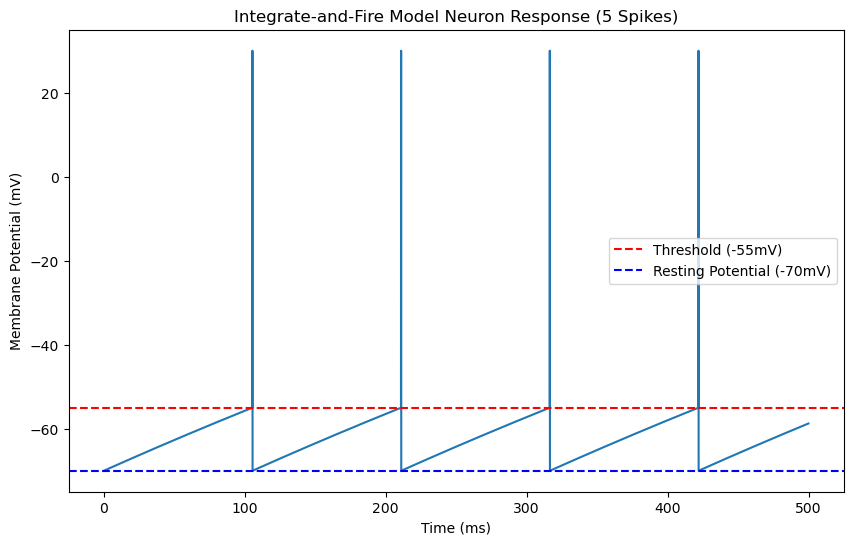

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_step = 0.1  # ms
total_time = 500  # ms
time = np.arange(0, total_time, time_step)
membrane_potential = np.full_like(time, -70.0)  # Start at resting potential (-70mV)
resting_potential = -70.0  # mV
threshold_potential = -55.0  # mV
reset_potential = -70.0  # mV (after spike)
spike_potential = 30.0  # mV (peak of action potential)
refractory_period = 5  # ms
refractory_time = int(refractory_period / time_step)
input_current = 15.0  # nA
membrane_resistance = 10.0  # MΩ
membrane_capacitance = 100.0  # pF
tau = membrane_resistance * membrane_capacitance  # Time constant

# Simulation
spike_count = 0
for t in range(1, len(time)):
    if spike_count >= 5:
        break

    if membrane_potential[t-1] == spike_potential:
        # Apply refractory period
        membrane_potential[t:t+refractory_time] = reset_potential
        continue

    dV = (resting_potential - membrane_potential[t-1] + (membrane_resistance * input_current)) / tau
    membrane_potential[t] = membrane_potential[t-1] + dV * time_step

    # Check for spike
    if membrane_potential[t] >= threshold_potential:
        membrane_potential[t] = spike_potential  # Depolarization (spike)
        spike_count += 1

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, membrane_potential)
plt.axhline(y=threshold_potential, color='red', linestyle='--', label='Threshold (-55mV)')
plt.axhline(y=resting_potential, color='blue', linestyle='--', label='Resting Potential (-70mV)')
plt.title('Integrate-and-Fire Model Neuron Response (5 Spikes)')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend()
plt.show()


### Here is some more information regarding the code: 
#### Comparing and contrasting the program to a biological neuron:
Similarities the I&F model has to a biological neuron is that both use summation to determine if an action potential is fired. Additionally, both require reaching threshold to fire a signal. Key differences include that the I&F model has a sudden repolarization, as opposed to the gradual repolarization that happens in a real neuron. In addition, real neurons use voltage gated ion channels and leaky channels, while the I&F model does not and needs a pattern generator. 
#### Reflection
The most challenging part of this homework was getting ChatGPT to give a good enough piece of code. The first two iterations of the model would not go beyond the threshold to fire an action potential. Telling the model to write the code so it fires five potentials fixed this, however. The project took about 40 minutes.

# Here is the Leaky Integrate and Fire Model. (NEW WORK FOR HOMEWORK III)

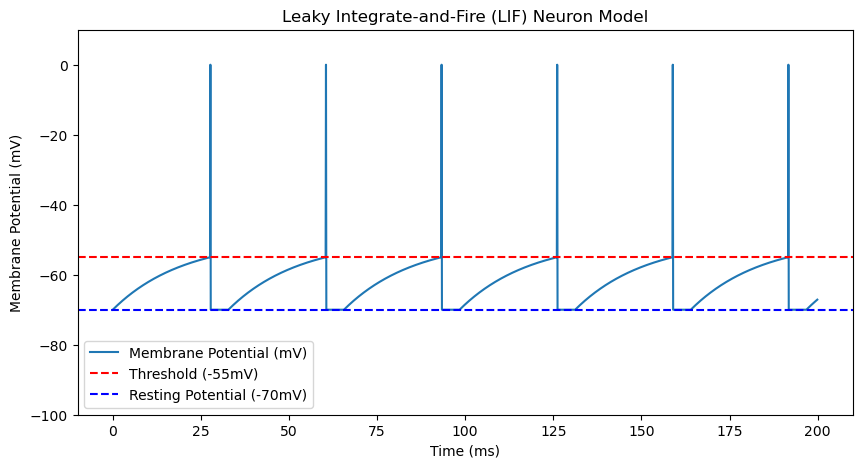

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 200  # Total time (ms)
time = np.arange(0, T, dt)

# LIF model parameters
V_rest = -70  # Resting potential (mV)
V_thresh = -55  # Threshold potential (mV)
V_reset = -70  # Reset potential after spike (mV)
R = 10  # Membrane resistance (MΩ)
tau = 20  # Membrane time constant (ms)
I = 2  # Input current (nA) to generate 5 spikes
refractory_period = 5  # Refractory period (ms)

# Initialize variables
V = np.ones(len(time)) * V_rest
spikes = []
t_refractory = 0  # Tracks refractory period

# Simulate LIF neuron dynamics
for t in range(1, len(time)):
    if t_refractory > 0:  # Neuron is in refractory period
        V[t] = V_reset
        t_refractory -= dt
    else:
        dV = (-(V[t-1] - V_rest) + R * I) * (dt / tau)
        V[t] = V[t-1] + dV
        
        if V[t] >= V_thresh:  # Fire a spike
            V[t] = 0  # Artificial spike for visualization
            spikes.append(time[t])
            t_refractory = refractory_period  # Apply refractory period

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential (mV)")
plt.axhline(y=V_thresh, color='r', linestyle='--', label="Threshold (-55mV)")
plt.axhline(y=V_rest, color='b', linestyle='--', label="Resting Potential (-70mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.ylim(-100, 10)  # Extend y-axis down to -100 mV
plt.title("Leaky Integrate-and-Fire (LIF) Neuron Model")
plt.legend()
plt.show()

### Here is the LIF model with insufficient input for it to fire action potentials.

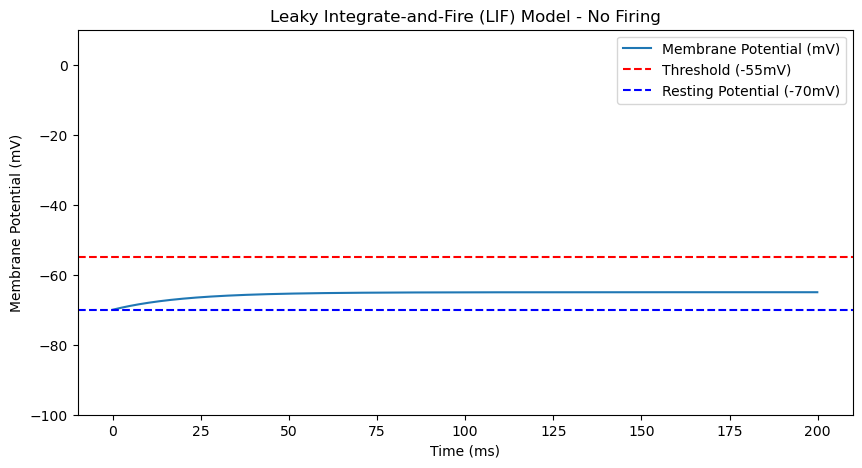

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 200  # Total time (ms)
time = np.arange(0, T, dt)

# LIF model parameters
V_rest = -70  # Resting potential (mV)
V_thresh = -55  # Threshold potential (mV)
V_reset = -70  # Reset potential after spike (mV)
R = 10  # Membrane resistance (MΩ)
tau = 20  # Membrane time constant (ms)
I = 0.5  # Weak input current (nA), not enough to trigger spikes
refractory_period = 5  # Refractory period (ms)

# Initialize variables
V = np.ones(len(time)) * V_rest

# Simulate LIF neuron dynamics
for t in range(1, len(time)):
    dV = (-(V[t-1] - V_rest) + R * I) * (dt / tau)
    V[t] = V[t-1] + dV

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, V, label="Membrane Potential (mV)")
plt.axhline(y=V_thresh, color='r', linestyle='--', label="Threshold (-55mV)")
plt.axhline(y=V_rest, color='b', linestyle='--', label="Resting Potential (-70mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.ylim(-100, 10)
plt.title("Leaky Integrate-and-Fire (LIF) Model - No Firing")
plt.legend()
plt.show()

### Here is the LIF model firing in bursts.

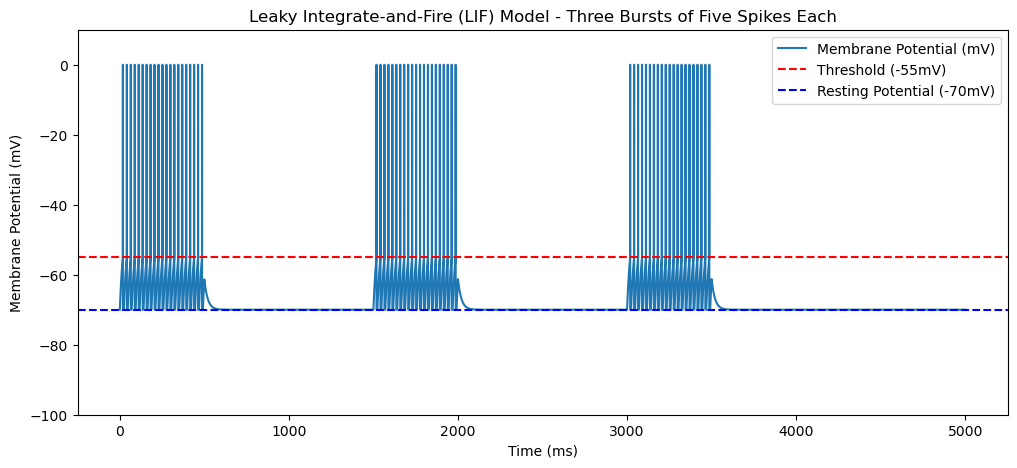

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
dt = 0.1  # Time step (ms)
T = 5000  # Total time (ms) to fit 3 bursts
time = np.arange(0, T, dt)

# LIF model parameters
V_rest = -70  # Resting potential (mV)
V_thresh = -55  # Threshold potential (mV)
V_reset = -70  # Reset potential after spike (mV)
R = 10  # Membrane resistance (MΩ)
tau = 20  # Membrane time constant (ms)
refractory_period = 5  # Refractory period (ms)
burst_duration = 500  # Each burst lasts 500 ms
rest_duration = 1000  # Rest period of 1000 ms

# Define the input current pattern for bursts
I = np.zeros(len(time))
burst_times = [0, 1500, 3000]  # Start times of bursts (every 1.5 sec)

for burst_start in burst_times:
    burst_end = burst_start + burst_duration
    I[(time >= burst_start) & (time < burst_end)] = 2.5  # Strong current during bursts

# Initialize variables
V = np.ones(len(time)) * V_rest
t_refractory = 0  # Tracks refractory period

# Simulate LIF neuron dynamics
for t in range(1, len(time)):
    if t_refractory > 0:  # Refractory period
        V[t] = V_reset
        t_refractory -= dt
    else:
        dV = (-(V[t-1] - V_rest) + R * I[t]) * (dt / tau)
        V[t] = V[t-1] + dV
        
        if V[t] >= V_thresh:  # Fire a spike
            V[t] = 0  # Artificial spike for visualization
            t_refractory = refractory_period  # Apply refractory period

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(time, V, label="Membrane Potential (mV)")
plt.axhline(y=V_thresh, color='r', linestyle='--', label="Threshold (-55mV)")
plt.axhline(y=V_rest, color='b', linestyle='--', label="Resting Potential (-70mV)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.ylim(-100, 10)
plt.title("Leaky Integrate-and-Fire (LIF) Model - Three Bursts of Five Spikes Each")
plt.legend()
plt.show()

### Here is some information about our code:
#### Definition of LIF:
The Leaky Integrate and Fire model (LIF) refers to an updated version of the original Integrate and Fire (I&F) mathematical model. The I&F model was originally proposed to accurately describe neuronal firing patterns elicited in response to various stimuli. In the LIF model, leaky ion channels are incorporated to make the model more analogous to a biological neuron, as the presence of leaky channels models the membrane potential as changing non-linearly. For instance, the LIF model’s ability to replicate the presence of leaky ion channels leads to the membrane potential decaying more naturally over time, instead of resetting immediately as seen in the I&F model. Although the LIF model still integrates incoming stimuli and fires an action potential when a specific threshold is reached, the model requires an artificial spike generator to generate action potentials when threshold is reached, since it does not take into account the presence of voltage-gated ion channels that naturally occur in a biological neuron.

#### Definition of HH: 
The Hodgkin-Huxley (HH) model refers to the most refined version of the Integrate and Fire (I&F) mathematical model discussed thus far, and is most closely aligned to the functions of a neuron. Similar to the Leaky Integrate and Fire model (LIF), the HH model attempts to describe neuronal firing patterns elicited in response to various stimuli, while taking into account leaky ion channels. However, this model also incorporates voltage-gated ion channels, such as sodium (Na+) and potassium (K+) channels, making it more complex. Specifically, the HH model receives and integrates incoming stimuli. If the incoming stimuli cause the membrane potential to reach threshold, appropriate voltage-gated ion channels will open and/or close to represent the firing of an action potential. As a result, the model can simulate the nonlinear processes involving membrane potential dynamics that a biological neuron normally exhibits, without relying on the presence of an artificial spike generator to generate the action potential. However, one significant limitation of the HH model is that it assumes all ion channels present in the neuron behave in the same manner, and that the same properties can be seen across all aspects that define the neuronal membrane (dendrites, soma, and axons).

### Discussion Questions
#### What changes had to be made and why? 
Before, the I&F model did not account for the non-linear processes that impact membrane potential. However, the LIF model now considers leaky channels as well as the hyperpolarization that occurs after an action potential. This time we also considered two distinct types of inputs. For instance, one situation that our new model had to consider was the possibility of inputs not summing to the threshold. In the code, we made sure to specifically instruct the model to consider this situation without altering the basic parameters. There was another issue when the inputs came in as bursts. Admittedly, that was a little harder to figure out. Just telling it to model bursting inputs did not work. We had to be very specific and mention the spiking behavior. 

#### How did you and/or ChatGPT implement the changes? As part of your answer, provide in “” the new parts of the code that produce this change.
To make the LIF model, we first told the AI this prompt: “Make me a leaky integrate and fire model in python that can be graphed in a jupyter notebook cell. Have it fire five times, and make sure it meets the following biological parameters: the x and y axis should be labeled and should reflect standard mV values. Ex: -55mV should be threshold, -65 or -70mV should be resting potential, etc.” We told ChatGPT to make the code in an incognito window so it would not get confused by previous code for the I&F model since it can get finicky with prior knowledge. 

Then, to make two pieces of code, one with output of not firing as a result of low input, and the other with bursts, we prompted the AI: “Please make two iterations of it, one in which there isn't sufficient potentials coming in to make it fire. In the other one, please make it fire in bursts.” It gave the correct code for both, eventually. 

For the no firing code, the AI changed the input variable “I” to .5, which was too low for firing. It was reflected in the code as so:

”I = 0.5  # Weak input current (nA), not enough to trigger spikes”
As for the burst code, it modified the code to create bursts as follows: 
“I = np.zeros(len(time))
burst_times = [0, 1500, 3000]  # Start times of bursts (every 1.5 sec)
for burst_start in burst_times:
    burst_end = burst_start + burst_duration
    I[(time >= burst_start) & (time < burst_end)] = 2.5  # Strong current during bursts”

#### Comparing Model’s Bits and Entropy (Discussion 4): 
A bit can be defined as a standard form of measurement that provides insight into the level of uncertainty or surprise related to a specific question or topic. It is typically thought of as the smallest amount of information that one can give someone. Accordingly, the convention is that one bit is equivalent to the unit of information required to differentiate the likelihood between two equally probable outcomes. In some scenarios it is easiest to think of bits as the quantity of binary answers needed to answer one question. 

Shannon’s entropy can be simply defined as a measure of the disorder or uncertainty in regards to data being communicated. This is an important concept to consider in regards to information. If the measure of Shannon’s entropy is quite high, that implies it requires more bits to accurately convey the information. 

When comparing the LIF model and I&F model, the LIF model will contain the most bits out of the two, since the LIF model has more complexity. For instance, there is more uncertainty (information required and thus bits) when the LIF model is used, due to it taking in account the nonlinear processes related to leaky ion channels impacting the membrane potential. Further, the LIF model takes into consideration hyperpolarization, which further adds both more complexity and information required when considering when to fire next. For the same reasons, between the LIF and I&F models, the former would have the most Shanon’s entropy. However, if we took in consideration the HH model, it would have the most bits (information required) and Shannon’s entropy as the addition of the voltage gated ion channels along with the leaky channels means this model considers a larger amount of information to determine if a firing will occur. 

### Reflection
#### In another set of Markdown code reflect on your ability to work collaboratively using Git-Hub. For instance, did you encounter any problems? How did you overcome them? Or are you still unable to make it work? (1pts) 

Working together on Git-Hub was hard to figure out at first as most of us hadn’t used it before. We tried it out and we think we got it to work, after ultimately deciding to get together in person. We collaboratively created the code in a google doc first and completed the rest of the assignment as a team on campus (teamwork makes the dream work!). Luckily, we didn't encounter any problems with the collective not working correctly, as we actually thought inviting people to the repository was pretty straightforward. 
